In [1]:
import numpy as np
import pandas as pd
import seaborn
import corner
import matplotlib.pyplot as plt

from load_all_data import *
likelihood_name=['none', 'all', 'crex', 'prex']

In [2]:
Skyrme_Sv_fit=np.array([[-527.63517486,  960.90032367,   32.57190263], [7.9034604,  5.54229394, np.sqrt(0.26283722**2+2.932327395**2)]])
RMF_Sv_fit   =np.array([[-603.92661734,  915.16211132,   33.69134024], [2.877702,   2.3558963,  np.sqrt(0.08202593**2+3.706824**2)]])

Skyrme_L_fit=np.array([[1794.30156274, 2642.18405652,  -91.44462774], [27.28591802, 19.09387008,  np.sqrt(0.90854965**2+10.142446**2)]])
RMF_L_fit   =np.array([[3292.32977663, 2349.18446447, -163.44830784], [23.34141903, 16.16647948,  np.sqrt(0.81640617**2+25.37046**2)]])

RMF_b4_fit   =np.array([[-32.67247477,  24.88743999,   0.9238387], [0.08176161,  0.06204431, np.sqrt(0.00240444**2+0.1179605**2)]])
Skyrme_b4_fit=np.array([[-52.88068838,  28.11911958,   1.69036289], [0.41022367, 0.28844105, np.sqrt(0.01364027**2+0.1535242**2)]])

PrexCrex_weighted=(np.array([Skyrme_Sv_fit[0,0],Skyrme_L_fit[0,0],Skyrme_b4_fit[0,0]])[:,np.newaxis]*(PrexCrex_Skyrme[0]-PrexCrex_Skyrme[2])+np.array([Skyrme_Sv_fit[0,1],Skyrme_L_fit[0,1],Skyrme_b4_fit[0,1]])[:,np.newaxis]*(PrexCrex_Skyrme[1]-PrexCrex_Skyrme[3]))
PrexCrex_RMF_weighted=(np.array([RMF_Sv_fit[0,0],RMF_L_fit[0,0],RMF_b4_fit[0,0]])[:,np.newaxis]*(PrexCrex_RMF[0]-PrexCrex_RMF[2])+np.array([RMF_Sv_fit[0,1],RMF_L_fit[0,1],RMF_b4_fit[0,1]])[:,np.newaxis]*(PrexCrex_RMF[1]-PrexCrex_RMF[3]))
PrexCrex_RMF_to_Skyrme_weighted=(np.array([RMF_Sv_fit[0,0],RMF_L_fit[0,0],RMF_b4_fit[0,0]])[:,np.newaxis]*(PrexCrex_RMF_to_Skyrme[0]-PrexCrex_RMF_to_Skyrme[2])+np.array([RMF_Sv_fit[0,1],RMF_L_fit[0,1],RMF_b4_fit[0,1]])[:,np.newaxis]*(PrexCrex_RMF_to_Skyrme[1]-PrexCrex_RMF_to_Skyrme[3]))

In [3]:
data=np.concatenate((eos_args_Skyrme[:2],[eos_args_Skyrme[2]*(eos_args_Skyrme[6]+5/4)],eos_args_Skyrme[3:],SAT_Skyrme,(PrexCrex_Skyrme[0:2]-PrexCrex_Skyrme[2:4]),PrexCrex_weighted),axis=0)
data_list=[data[:,index_list_Skyrme[i]:index_list_Skyrme[i+1]] for i in range(4)]
data_name=['$t_0$ [MeV fm$^3$]','$t_1$ [MeV fm$^5$]','$t_2(x_2+\\frac{5}{4})$ [MeV fm$^5$]','$t_3$ [MeV fm$^{3+\\alpha}$]','$x_0$ []','$x_1$ []','$x_2$ []','$x_3$ []','$\\alpha$ []','$b_4$ [fm$^4$]','$b\'_4$ [fm$^4$]','$m^*$ [MeV]','$n_s$[fm$^{-3}$]','B [MeV]','S$_v$ [MeV]','L [MeV]','K [MeV]','K$_{sym}$ [MeV]','$\Delta F_{Ca}$ []','$\Delta F_{Pb}$ []','$a\Delta F_{Ca}+b\Delta F_{Pb}$[]','$a\'\Delta F_{Ca}+b\'\Delta F_{Pb}$[]','$a\'\'\Delta F_{Ca}+b\'\'\Delta F_{Pb}$[]']
print(data.shape,len(data_name))

data_basic=np.concatenate((PrexCrex_Skyrme[4:10],PrexCrex_Skyrme[0:2],(PrexCrex_Skyrme[0:2]-PrexCrex_Skyrme[2:4]),[PrexCrex_Skyrme[12]-PrexCrex_Skyrme[13],PrexCrex_Skyrme[10]-PrexCrex_Skyrme[11]]),axis=0)
data_basic_list=[data_basic[:,index_list_Skyrme[i]:index_list_Skyrme[i+1]] for i in range(4)]
# FchCa FchPb FwCa FwPb RchCa(fm) RchZr(fm) RchPb(fm) BECa(MeV) BEZr(MeV) BEPb(MeV) 
# Rn_Pb208 (fm) Rp_Pb208(fm) Rn_Ca48(fm) Rp_Ca48(fm)
data_basic_name=['$R_{ch}^{Ca}$ [fm]','$R_{ch}^{Zr}$ [fm]','$R_{ch}^{Pb}$ [fm]','(E/A)$_{Ca}$ [MeV]','(E/A)$_{Zr}$ [MeV]','(E/A)$_{Pb}$ [MeV]','$F^{Ca}_{ch}$ []','$F^{Pb}_{ch}$ []','$\Delta F_{Ca}$ []','$\Delta F_{Pb}$ []','$\Delta R_{Ca}$ [fm]','$\Delta R_{Pb}$ [fm]']
print(data_basic.shape,len(data_basic_name))

(23, 9498) 23
(12, 9498) 12


In [4]:
b4p=(eos_args_RMF[4]/763**2+eos_args_RMF[2]/980**2)/(8*939**2)*197.3**4
b4 =(eos_args_RMF[1]/eos_args_RMF[0]**2+eos_args_RMF[3]/782.5**2)/(4*939**2)*197.3**4-b4p/2
data_RMF=np.concatenate((eos_args_RMF,[b4,b4p],SAT_RMF,(PrexCrex_RMF[0:2]-PrexCrex_RMF[2:4]),PrexCrex_RMF_weighted),axis=0)
data_RMF_list=[data_RMF[:,index_list_RMF[i]:index_list_RMF[i+1]] for i in range(4)]
data_RMF_name=['m$_\sigma$ [MeV]','g$_\sigma^2$ []','g$_\delta^2$ []','g$_{\omega}^2$ []','g$_\\rho^2$ []','$\kappa$ [MeV]','$\lambda$ []','$\Lambda_{\omega\\rho}$','$\zeta_\omega$ []','$b_4$ [fm$^4$]','$b\'_4$ [fm$^4$]','$m^*$ [MeV]','$n_s$[fm$^{-3}$]','BE [MeV]','S$_v$ [MeV]','L [MeV]','K [MeV]','K$_{sym}$ [MeV]','$\Delta F_{Ca}$ []','$\Delta F_{Pb}$ []','$a\Delta F_{Ca}+b\Delta F_{Pb}$[]','$a\'\Delta F_{Ca}+b\'\Delta F_{Pb}$[]','$a\'\'\Delta F_{Ca}+b\'\'\Delta F_{Pb}$[]']
print(data_RMF.shape,len(data_RMF_name))

data_RMF_basic=np.concatenate((PrexCrex_RMF[4:10],PrexCrex_RMF[0:2],(PrexCrex_RMF[0:2]-PrexCrex_RMF[2:4]),[PrexCrex_RMF[12]-PrexCrex_RMF[13],PrexCrex_RMF[10]-PrexCrex_RMF[11]]),axis=0)
data_RMF_basic_list=[data_RMF_basic[:,index_list_RMF[i]:index_list_RMF[i+1]] for i in range(4)]
# FchCa FchPb FwCa FwPb RchCa(fm) RchZr(fm) RchPb(fm) BECa(MeV) BEZr(MeV) BEPb(MeV) 
# Rn_Pb208 (fm) Rp_Pb208(fm) Rn_Ca48(fm) Rp_Ca48(fm)
data_RMF_basic_name=['$R_{ch}^{Ca}$ [fm]','$R_{ch}^{Zr}$ [fm]','$R_{ch}^{Pb}$ [fm]','(E/A)$_{Ca}$ [MeV]','(E/A)$_{Zr}$ [MeV]','(E/A)$_{Pb}$ [MeV]','$F^{Ca}_{ch}$ []','$F^{Pb}_{ch}$ []','$\Delta F_{Ca}$ []','$\Delta F_{Pb}$ []','$\Delta R_{Ca}$ [fm]','$\Delta R_{Pb}$ [fm]']
print(data_RMF_basic.shape,len(data_RMF_basic_name))

(23, 26992) 23
(12, 26992) 12


In [5]:
b4p=(eos_args_RMF_to_Skyrme[4]/763**2+eos_args_RMF_to_Skyrme[2]/980**2)/(8*939**2)*197.3**4
b4 =(eos_args_RMF_to_Skyrme[1]/eos_args_RMF_to_Skyrme[0]**2+eos_args_RMF_to_Skyrme[3]/782.5**2)/(4*939**2)*197.3**4-b4p/2
data_RMF_to_Skyrme=np.concatenate((eos_args_RMF_to_Skyrme,[b4,b4p],SAT_RMF_to_Skyrme,(PrexCrex_RMF_to_Skyrme[0:2]-PrexCrex_RMF_to_Skyrme[2:4]),PrexCrex_RMF_to_Skyrme_weighted),axis=0)
data_RMF_to_Skyrme_list=[data_RMF_to_Skyrme[:,index_list_RMF_to_Skyrme[i]:index_list_RMF_to_Skyrme[i+1]] for i in range(4)]
data_RMF_name=['m$_\sigma$ [MeV]','g$_\sigma^2$ []','g$_\delta^2$ []','g$_{\omega}^2$ []','g$_\\rho^2$ []','$\kappa$ [MeV]','$\lambda$ []','$\Lambda_{\omega\\rho}$','$\zeta_\omega$ []','$b_4$ [fm$^4$]','$b\'_4$ [fm$^4$]','$m^*$ [MeV]','$n_s$[fm$^{-3}$]','B [MeV]','S$_v$ [MeV]','L [MeV]','K [MeV]','K$_{sym}$ [MeV]','$\Delta F_{Ca}$ []','$\Delta F_{Pb}$ []','$a\Delta F_{Ca}+b\Delta F_{Pb}$[]','$a\'\Delta F_{Ca}+b\'\Delta F_{Pb}$[]','$a\'\'\Delta F_{Ca}+b\'\'\Delta F_{Pb}$[]']
print(data_RMF_to_Skyrme.shape,len(data_RMF_name))

data_RMF_to_Skyrme_basic=np.concatenate((PrexCrex_RMF_to_Skyrme[4:10],PrexCrex_RMF_to_Skyrme[0:2],(PrexCrex_RMF_to_Skyrme[0:2]-PrexCrex_RMF_to_Skyrme[2:4]),[PrexCrex_RMF_to_Skyrme[12]-PrexCrex_RMF_to_Skyrme[13],PrexCrex_RMF_to_Skyrme[10]-PrexCrex_RMF_to_Skyrme[11]]),axis=0)
data_RMF_to_Skyrme_basic_list=[data_RMF_to_Skyrme_basic[:,index_list_RMF_to_Skyrme[i]:index_list_RMF_to_Skyrme[i+1]] for i in range(4)]
# FchCa FchPb FwCa FwPb RchCa(fm) RchZr(fm) RchPb(fm) BECa(MeV) BEZr(MeV) BEPb(MeV) 
# Rn_Pb208 (fm) Rp_Pb208(fm) Rn_Ca48(fm) Rp_Ca48(fm)
data_RMF_basic_name=['$R_{ch}^{Ca}$ [fm]','$R_{ch}^{Zr}$ [fm]','$R_{ch}^{Pb}$ [fm]','(E/A)$_{Ca}$ [MeV]','(E/A)$_{Zr}$ [MeV]','(E/A)$_{Pb}$ [MeV]','$F^{Ca}_{ch}$ []','$F^{Pb}_{ch}$ []','$\Delta F_{Ca}$ []','$\Delta F_{Pb}$ []','$\Delta R_{Ca}$ [fm]','$\Delta R_{Pb}$ [fm]']
print(data_RMF_to_Skyrme_basic.shape,len(data_RMF_basic_name))

(23, 31431) 23
(12, 31431) 12


In [6]:
pd_Skyrme        = pd.DataFrame(data=data.transpose(),columns=data_name)
pd_RMF           = pd.DataFrame(data=data_RMF.transpose(),columns=data_RMF_name)
pd_RMF_to_Skyrme = pd.DataFrame(data=data_RMF_to_Skyrme.transpose(),columns=data_RMF_name)

pd_list  =[pd_Skyrme,pd_RMF,pd_RMF_to_Skyrme]
name_list=['Skyrme','RMF','RMF_to_Skyrme']

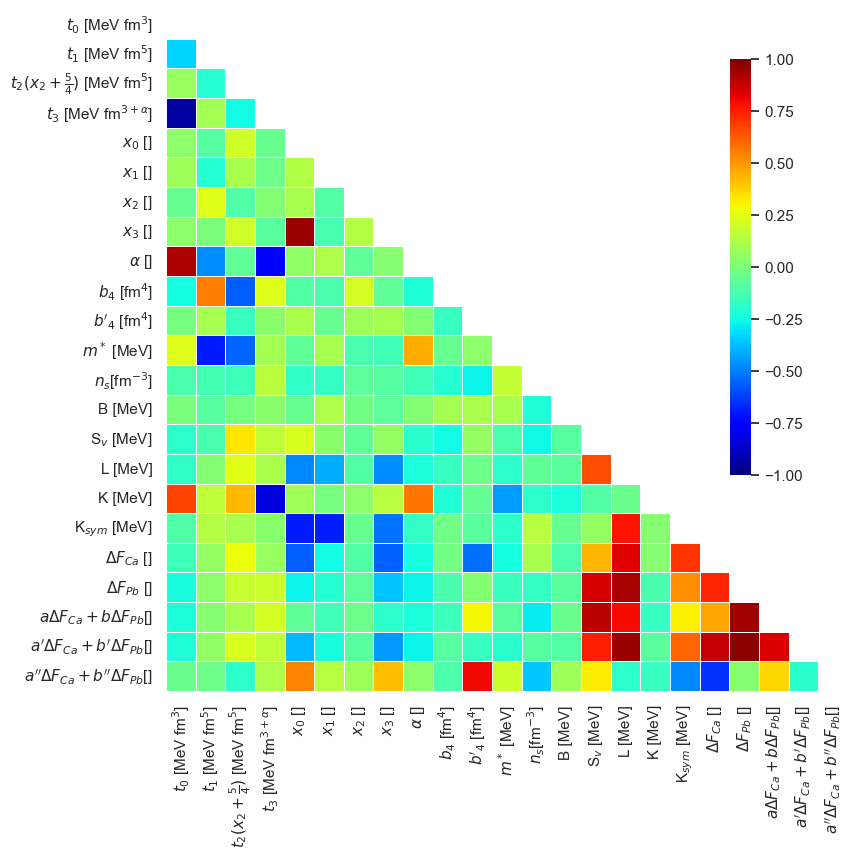

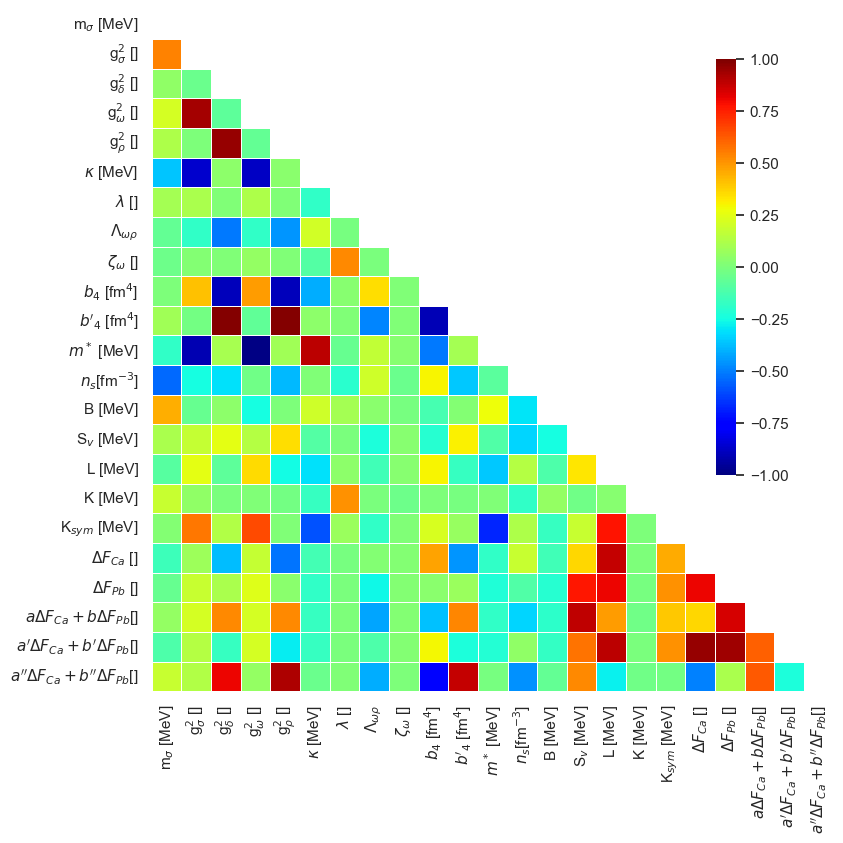

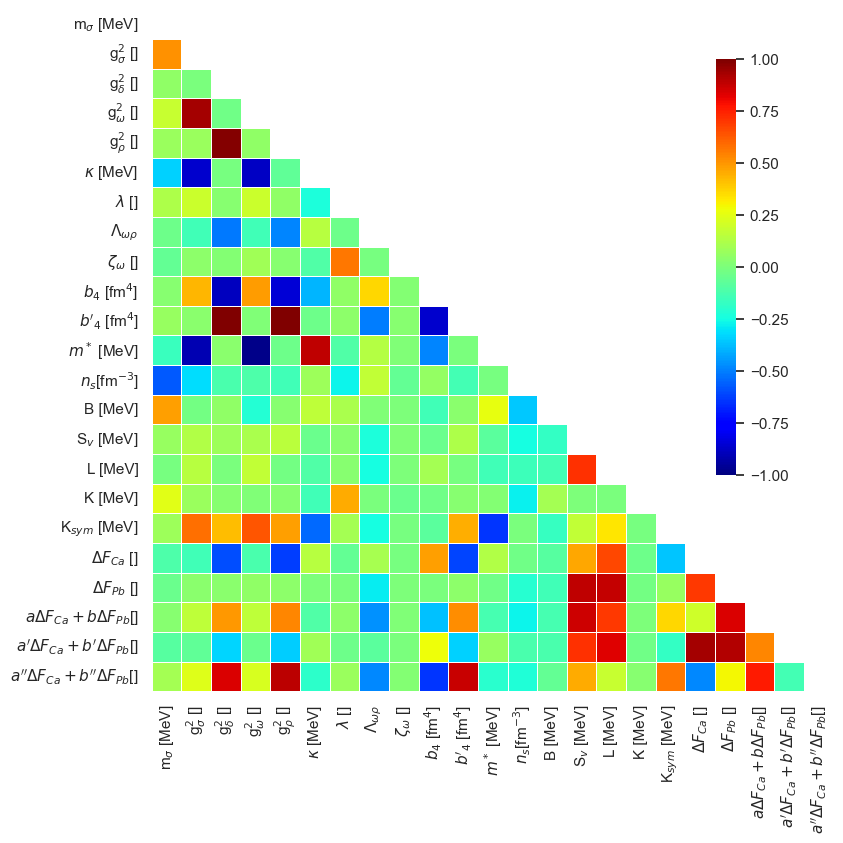

In [7]:
seaborn.set_theme(style="white")
for pd,name in zip(pd_list,name_list):
    # Compute the correlation matrix
    corr = pd.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    seaborn.heatmap(corr, mask=mask, cmap='jet', vmax=1,vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": 0.6,'anchor':(-1.5,0.8)})

    plt.savefig('./figures/pearson_'+name+'.pdf',bbox_inches = 'tight',format='pdf')

In [ ]:
#This block generates big corner plots which take long time and memory

data_list_all=[data_list,data_RMF_list,data_RMF_to_Skyrme_list]
data_name_list=[data_name,data_RMF_name,data_RMF_name]
for name_i,data_list_i,data_name_list_i in zip(name_list,data_list_all,data_name_list):
    for data_i,likelihood_name_i in zip(data_list_i,likelihood_name):
        figure = corner.corner(data_i.transpose(),labels=data_name_list_i,label_kwargs={'size':16},show_titles=True,title_fmt=".2E")
        plt.savefig('./figures/'+name_i+'_'+likelihood_name_i+'.pdf',bbox_inches = 'tight',format='pdf')

data_basic_list_all=[data_basic_list,data_RMF_basic_list,data_RMF_to_Skyrme_basic_list]
data_basic_name_list=[data_basic_name,data_RMF_basic_name,data_RMF_basic_name]
for name_i,data_list_i,data_name_list_i in zip(name_list,data_basic_list_all,data_basic_name_list):
    for data_i,likelihood_name_i in zip(data_list_i,likelihood_name):
        figure = corner.corner(data_i.transpose(),labels=data_name_list_i,label_kwargs={'size':20},show_titles=True,title_fmt=".2E")
        plt.savefig('./figures/'+name_i+'_basic_'+likelihood_name_i+'.pdf',bbox_inches = 'tight',format='pdf')